# Pandas on the Titanic dataset

A simple analysis of the [Titanic dataset](https://www.kaggle.com/c/titanic/data) with Pandas.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

## Data

In [2]:
df = sns.load_dataset('titanic')

In [3]:
# sibsp = nb of siblings / spouses
# parch = nb of parents / children
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [5]:
df.nunique()

survived         2
pclass           3
sex              2
age             88
sibsp            7
parch            7
fare           248
embarked         3
class            3
who              3
adult_male       2
deck             7
embark_town      3
alive            2
alone            2
dtype: int64

In [6]:
df.mean()

survived       0.383838
pclass         2.308642
age           29.699118
sibsp          0.523008
parch          0.381594
fare          32.204208
adult_male     0.602694
alone          0.602694
dtype: float64

In [7]:
df.sort_values('age')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
803,1,3,male,0.42,0,1,8.5167,C,Third,child,False,NaN,Cherbourg,yes,False
755,1,2,male,0.67,1,1,14.5000,S,Second,child,False,NaN,Southampton,yes,False
644,1,3,female,0.75,2,1,19.2583,C,Third,child,False,NaN,Cherbourg,yes,False
469,1,3,female,0.75,2,1,19.2583,C,Third,child,False,NaN,Cherbourg,yes,False
78,1,2,male,0.83,0,2,29.0000,S,Second,child,False,NaN,Southampton,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,C,Third,man,True,NaN,Cherbourg,no,True
863,0,3,female,NaN,8,2,69.5500,S,Third,woman,False,NaN,Southampton,no,False
868,0,3,male,NaN,0,0,9.5000,S,Third,man,True,NaN,Southampton,no,True
878,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True


<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

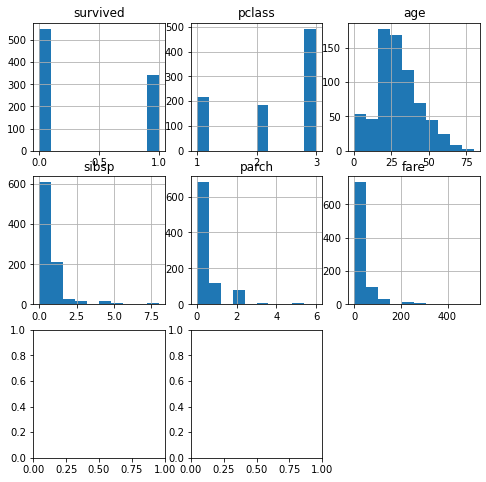

In [8]:
df.hist(figsize=(8,8));

## Analysis

In [9]:
df.groupby('sex')['survived'].mean()

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

In [10]:
df.pivot_table('survived', index='sex', columns='pclass')

pclass,1,2,3
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [11]:
df.pivot_table('survived', index='sex', columns='pclass', margins=True)

pclass,1,2,3,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


In [14]:
age_cat = pd.cut(df['age'], [0, 18, 25, 40, 100])

In [15]:
age_cat

0      (18.0, 25.0]
1      (25.0, 40.0]
2      (25.0, 40.0]
3      (25.0, 40.0]
4      (25.0, 40.0]
           ...     
886    (25.0, 40.0]
887    (18.0, 25.0]
888             NaN
889    (25.0, 40.0]
890    (25.0, 40.0]
Name: age, Length: 891, dtype: category
Categories (4, interval[int64]): [(0, 18] < (18, 25] < (25, 40] < (40, 100]]

In [16]:
age_cat.value_counts(sort=False)

(0, 18]      139
(18, 25]     162
(25, 40]     263
(40, 100]    150
Name: age, dtype: int64

In [17]:
age_cat.describe()

count          714
unique           4
top       (25, 40]
freq           263
Name: age, dtype: object

In [18]:
age_cat = age_cat.cat.add_categories("Unknown")
age_cat = age_cat.fillna("Unknown")

In [19]:
age_cat.describe()

count          891
unique           5
top       (25, 40]
freq           263
Name: age, dtype: object

In [20]:
df_survived = df.pivot_table('survived', index=['sex', age_cat], columns='pclass')
df_survived

pclass                   1         2         3
sex    age                                    
female (0, 18]    0.909091  1.000000  0.511628
       (18, 25]   0.941176  0.933333  0.500000
       (25, 40]   1.000000  0.906250  0.464286
       (40, 100]  0.961538  0.846154  0.111111
       Unknown    1.000000  1.000000  0.595238
male   (0, 18]    0.800000  0.600000  0.215686
       (18, 25]   0.333333  0.047619  0.115385
       (25, 40]   0.513514  0.071429  0.172043
       (40, 100]  0.280000  0.095238  0.064516
       Unknown    0.238095  0.222222  0.095745

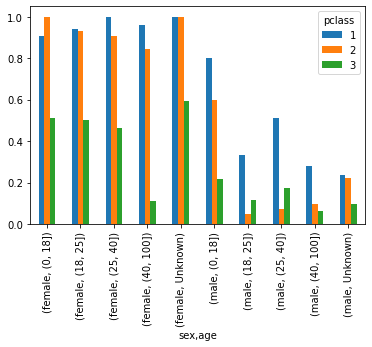

In [21]:
df_survived.plot(kind='bar');

In [22]:
df.pivot_table('survived', index=['sex', age_cat], columns='pclass', aggfunc=[np.sum, len])

sum         len        
pclass             1   2   3   1   2   3
sex    age                              
female (0, 18]    10  14  22  11  14  43
       (18, 25]   16  14  11  17  15  22
       (25, 40]   31  29  13  31  32  28
       (40, 100]  25  11   1  26  13   9
       Unknown     9   2  25   9   2  42
male   (0, 18]     4   9  11   5  15  51
       (18, 25]    3   1   9   9  21  78
       (25, 40]   19   3  16  37  42  93
       (40, 100]  14   2   2  50  21  31
       Unknown     5   2   9  21   9  94

In [23]:
df.corrwith(df['survived'])

survived      1.000000
pclass       -0.338481
age          -0.077221
sibsp        -0.035322
parch         0.081629
fare          0.257307
adult_male   -0.557080
alone        -0.203367
dtype: float64